In [1]:
import pandas as pd
import talib
import yfinance as yf





In [2]:
# Load stock price data
df = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\Documents\week0ne\data\NVDA_historical_data.csv') 
# Convert 'Date' to datetime format and set it as the index
# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Convert relevant columns to numeric and fill null values
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Count null values
null_counts = df.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Remove rows with any null values
df_cleaned = df.dropna()

# Display shape before and after cleaning
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

# If you need to continue with calculations
df_cleaned['SMA'] = talib.SMA(df_cleaned['Close'], timeperiod=14)
df_cleaned['RSI'] = talib.RSI(df_cleaned['Close'], timeperiod=14)
df_cleaned['MACD'], df_cleaned['MACD_Signal'], df_cleaned['MACD_Hist'] = talib.MACD(df_cleaned['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Final DataFrame structure
print("Final cleaned DataFrame structure:")
print(df_cleaned.info())
print(df.dtypes)

Null values in each column:
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Original DataFrame shape: (6421, 8)
Cleaned DataFrame shape: (6421, 8)
Final cleaned DataFrame structure:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6421 entries, 1999-01-22 to 2024-07-30
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6421 non-null   float64
 1   High          6421 non-null   float64
 2   Low           6421 non-null   float64
 3   Close         6421 non-null   float64
 4   Adj Close     6421 non-null   float64
 5   Volume        6421 non-null   int64  
 6   Dividends     6421 non-null   float64
 7   Stock Splits  6421 non-null   float64
 8   SMA           6408 non-null   float64
 9   RSI           6407 non-null   float64
 10  MACD          6388 non-null   float64
 11  MACD_Signal   6388 n

In [3]:
null_counts = df.isnull().sum()

In [4]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

In [5]:
# If 'Date' is found, convert it to datetime and set as index
df = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\Documents\week0ne\data\NVDA_historical_data.csv') 
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    print("Date column converted and set as index.")
    df=[print(df.head)]
   
else:
    print("No 'Date' column found. Please check the CSV structure.")
    


Date column converted and set as index.
<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
1999-01-22    0.043750    0.048828    0.038802    0.041016    0.037621   
1999-01-25    0.044271    0.045833    0.041016    0.045313    0.041562   
1999-01-26    0.045833    0.046745    0.041146    0.041797    0.038337   
1999-01-27    0.041927    0.042969    0.039583    0.041667    0.038218   
1999-01-28    0.041667    0.041927    0.041276    0.041536    0.038098   
...                ...         ...         ...         ...         ...   
2024-07-24  119.169998  119.949997  113.440002  114.250000  114.250000   
2024-07-25  113.040001  116.629997  106.300003  112.279999  112.279999   
2024-07-26  116.190002  116.199997  111.580002  113.059998  113.059998   
2024-07-29  113.690002  116.279999  111.300003  111.589996  111.589996   
2024-07-30  111.519997  111.989998  102.54

In [1]:
import pandas as pd
import talib
df = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\Documents\week0ne\data\NVDA_historical_data.csv') 
# Calculate a TA-Lib indicator Simple Moving Average
df['SMA'] = talib.SMA(df['Close'], timeperiod=200)  # 200 days
# Calculate a TA-Lib indicator Relative Strength Index
df['RSI'] = talib.RSI(df['Close'], timeperiod=200)  # 200 days

# Calculate MACD
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12,slowperiod=26,signalperiod=9)

# Remove rows with NaN values after calculations
df = df.dropna()
# Display the last few rows of the DataFrame
print(df[['Close', 'SMA', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']])                                         

           Close        SMA        RSI      MACD  MACD_Signal  MACD_Hist
200     0.058854   0.042845  53.045690  0.002774     0.000847   0.001927
201     0.060547   0.042922  53.316937  0.003309     0.001339   0.001970
202     0.059635   0.043011  53.150705  0.003618     0.001795   0.001823
203     0.059115   0.043098  53.055915  0.003778     0.002192   0.001586
204     0.063281   0.043207  53.720481  0.004192     0.002592   0.001600
...          ...        ...        ...       ...          ...        ...
6416  114.250000  78.288715  57.747762 -0.007652     1.879233  -1.886885
6417  112.279999  78.621305  57.390358 -0.817813     1.339824  -2.157637
6418  113.059998  78.960240  57.495039 -1.381013     0.795656  -2.176669
6419  111.589996  79.289200  57.228737 -1.923793     0.251767  -2.175559
6420  103.730003  79.573820  55.838903 -2.954132    -0.389413  -2.564719

[6221 rows x 6 columns]


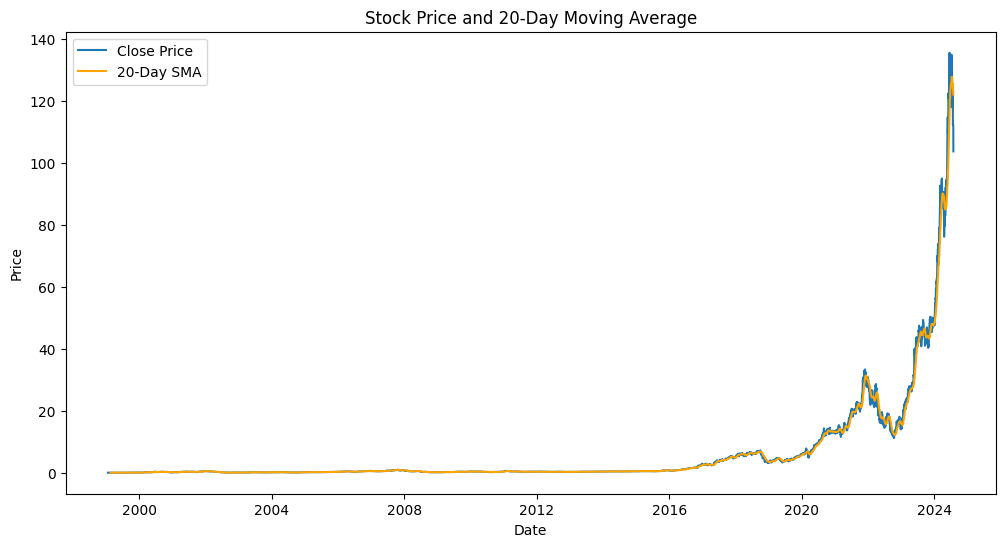

In [2]:
import matplotlib.pyplot as plt
# Load the data into a DataFrame
df = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\Documents\week0ne\data\NVDA_historical_data.csv', parse_dates=['Date'], index_col='Date')

# Ensure the 'Close' column is  correct data type
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Calculate a 20-day moving average
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
# Plot the closing prices and the moving average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['SMA_20'], label='20-Day SMA', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price and 20-Day Moving Average')
plt.legend()
plt.show()